In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from cpu_stats import Constant as Constant, _get_cpu_model

loaded_df = pd.read_excel("./result.xlsx")

loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14328 entries, 0 to 14327
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Model              14297 non-null  object
 1   url                14328 non-null  object
 2   CPU model          14328 non-null  object
 3   Single-Core Score  14328 non-null  int64 
 4   Multi-Core Score   14328 non-null  int64 
 5   Platform           14328 non-null  object
dtypes: int64(2), object(4)
memory usage: 671.8+ KB


In [2]:
loaded_df.head()

,Model,url,CPU model,Single-Core Score,Multi-Core Score,Platform
0,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15571055,AMD Ryzen 5 6600U 2901 MHz (6 cores),1451,6212,Windows
1,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15454983,AMD Ryzen 5 6600U 2901 MHz (6 cores),1441,6394,Windows
2,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15454961,AMD Ryzen 5 6600U 2901 MHz (6 cores),1435,6353,Windows
3,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15146848,AMD Ryzen 5 6600U 2901 MHz (6 cores),1458,6341,Windows
4,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15145835,AMD Ryzen 5 6600U 2901 MHz (6 cores),624,3610,Windows


In [3]:

S_CPU_MANUFACTURER = "CPU manufacturer"
S_CPU_FULL_NAME = "CPU model long"
S_SCORE = "Score"

df_copy = loaded_df.copy(deep=True)
df_copy[S_CPU_MANUFACTURER] = df_copy[Constant.CPU_MODEL].apply(lambda x: x.split(" ")[0])

# Filter only Windows
df_copy = df_copy[df_copy["Platform"] == "Windows"]

df_copy[S_CPU_FULL_NAME] = df_copy[Constant.CPU_MODEL]
df_copy[Constant.CPU_MODEL] = df_copy[Constant.CPU_MODEL].apply(_get_cpu_model)
df_na = df_copy[df_copy[Constant.CPU_MODEL].isnull()]
df = df_copy[~df_copy[Constant.CPU_MODEL].isnull()]

df.head()

,Model,url,CPU model,Single-Core Score,Multi-Core Score,Platform,CPU manufacturer,CPU model long
0,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15571055,6600U,1451,6212,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)
1,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15454983,6600U,1441,6394,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)
2,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15454961,6600U,1435,6353,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)
3,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15146848,6600U,1458,6341,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)
4,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15145835,6600U,624,3610,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)


In [4]:
def plot(plot_func, *args, **kwargs):
    _, ax = pyplot.subplots(figsize=(11, 8))
    ax.tick_params(rotation=90)
    kwargs["ax"] = ax
    kwargs["order"] = kwargs["data"].groupby(kwargs["x"])[kwargs["y"]].mean().sort_values().index.values

    ax = plot_func(*args, **kwargs)
    for p in ax.patches:
        ax.annotate(
            "%.0f" % p.get_height(),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            rotation=90,
            fontsize=11,
            xytext=(0, 20),
            textcoords="offset points",
        )

    ax.legend(loc="upper left")
    ax.set_ylim(0, kwargs["data"][kwargs["y"]].max() * 1.1)


df.head()

,Model,url,CPU model,Single-Core Score,Multi-Core Score,Platform,CPU manufacturer,CPU model long
0,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15571055,6600U,1451,6212,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)
1,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15454983,6600U,1441,6394,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)
2,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15454961,6600U,1435,6353,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)
3,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15146848,6600U,1458,6341,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)
4,ASUSTeK COMPUTER INC. Zenbook UM5302TA_UM5302TA,https://browser.geekbench.com/v5/cpu/15145835,6600U,624,3610,Windows,AMD,AMD Ryzen 5 6600U 2901 MHz (6 cores)


,CPU model,Platform,CPU manufacturer,count
0,1210U,Windows,Intel,1
1,1215U,Windows,Intel,33
2,1235U,Windows,Intel,120
3,1240P,Windows,Intel,874
4,12450H,Windows,Intel,25


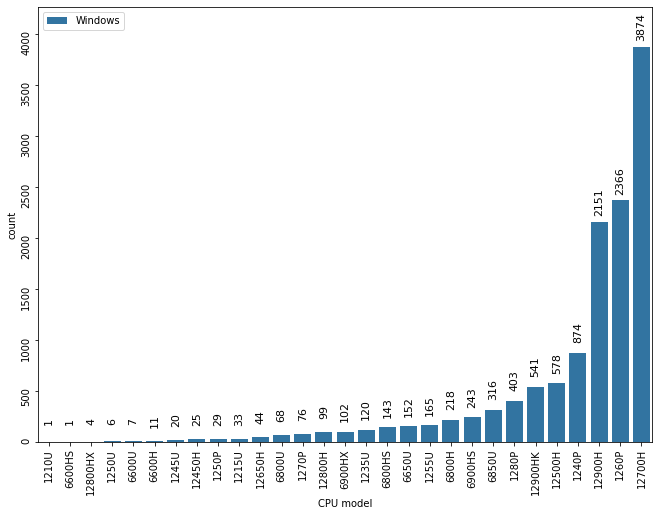

In [5]:
counts = (
    df.groupby([Constant.CPU_MODEL, Constant.PLATFORM, S_CPU_MANUFACTURER])[
        Constant.CPU_MODEL
    ]
    .count()
    .reset_index(name="count")
)
plot(sns.barplot, x=Constant.CPU_MODEL, y="count", hue=Constant.PLATFORM, data=counts)
counts.head()

# Single core results

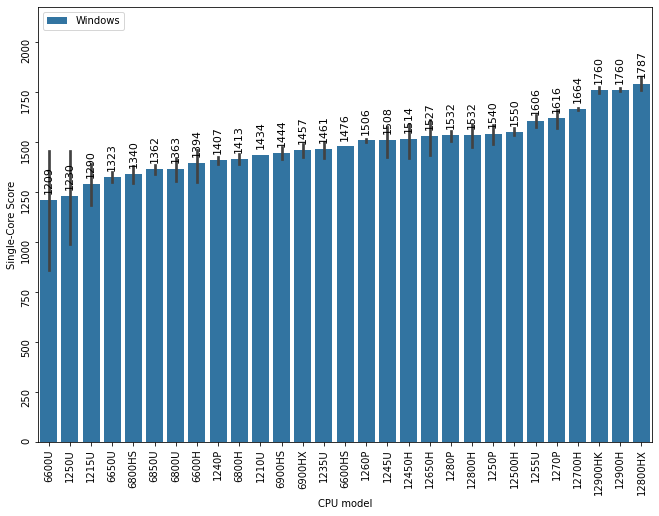

In [6]:
plot(sns.barplot, x=Constant.CPU_MODEL, y=Constant.SINGLE_CORE_SCORE, hue=Constant.PLATFORM, data=df)

# Multi core results

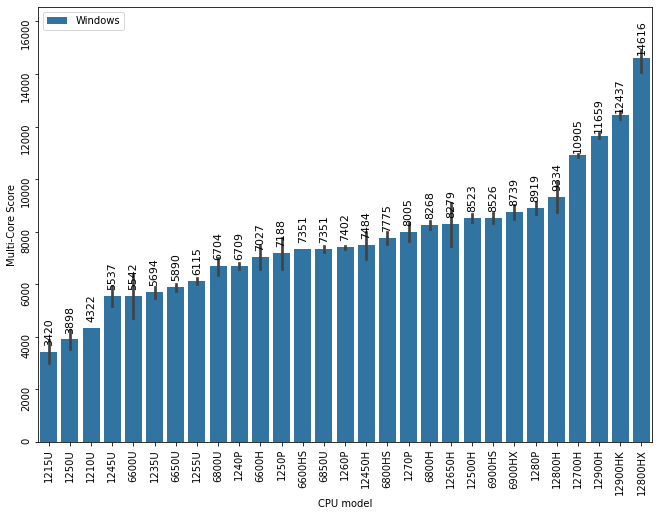

In [7]:
plot(sns.barplot, x=Constant.CPU_MODEL, y=Constant.MULTI_CORE_SCORE, hue=Constant.PLATFORM, data=df)